**Simple Linear Regression using (OLS) Ordinary Least Squares method. Develop a regression model to predict the Fare based on Distance travelled**



---



# 1) Importing necessary modules.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2) Importing Dataset (Flight_fare.csv) and understanding the data

In [5]:
import pandas as pd
flight = pd.read_csv("/content/drive/MyDrive/Flight_fare.csv")   #importing or reading the dataset and storing it as flight
flight.head()   # printing first 5 rows

,Sl. No,Source,Destination,AverageFare,Distance,AverageWeeklyPassenger,MarketLeadingAirline,MarketShareLeadingAirline,AverageFareLeadingAirline,LowPriceAirline,MarketShareLowestPrice,LowestPrice,PredictedFare
0,0,AK,ATL,114.47,528.0,424.56,FL,70.19,111.03,FL,70.19,111.03,121.753611
1,1,CAK,MCO,122.47,860.0,276.84,FL,75.10,123.09,DL,17.23,118.94,172.505965
2,2,ALB,ATL,214.42,852.0,215.76,DL,78.89,223.98,CO,2.77,167.12,182.803605
3,3,ALB,BWI,69.40,288.0,606.84,WN,96.97,68.86,WN,96.97,68.86,104.440197
4,4,ALB,ORD,158.13,723.0,313.04,UA,39.79,161.36,WN,15.34,145.42,152.309288


In [6]:
flight.tail()     # printing last 5 rows

,Sl. No,Source,Destination,AverageFare,Distance,AverageWeeklyPassenger,MarketLeadingAirline,MarketShareLeadingAirline,AverageFareLeadingAirline,LowPriceAirline,MarketShareLowestPrice,LowestPrice,PredictedFare
995,995,SYR,TPA,136.16,1104.0,184.34,US,33.37,135.82,DL,28.65,118.51,160.039391
996,996,TLH,TPA,83.28,200.0,232.71,FL,99.57,82.55,FL,99.57,82.55,101.305510
997,997,TPA,IAD,159.97,814.0,843.80,US,46.19,159.65,DL,13.89,159.02,157.993237
998,998,TPA,PBI,73.57,174.0,214.45,WN,99.74,73.44,WN,99.74,73.44,100.117477
999,999,IAD,PBI,126.67,859.0,475.65,US,56.28,129.92,DL,38.57,121.94,150.741926


In [7]:
flight.describe()     #  It gives aggregates of each columns

,Sl. No,AverageFare,Distance,AverageWeeklyPassenger,MarketShareLeadingAirline,AverageFareLeadingAirline,MarketShareLowestPrice,LowestPrice,PredictedFare
count,1000.000000,997.000000,998.00000,997.000000,996.000000,999.000000,997.000000,998.000000,998.000000
mean,499.500000,163.458044,1057.39479,670.109699,60.128454,166.633774,34.564514,143.314038,163.437768
std,288.819436,55.381637,643.59183,765.344010,19.313468,62.690008,27.130460,47.196076,36.413815
min,0.000000,50.520000,108.00000,181.410000,17.680000,50.520000,1.060000,49.610000,93.440141
25%,249.750000,125.980000,554.00000,256.950000,46.510000,124.060000,13.180000,113.865000,135.605147
50%,499.500000,161.360000,919.00000,404.560000,59.240000,161.360000,26.120000,137.840000,161.499516
75%,749.250000,197.520000,1457.50000,768.800000,73.510000,203.105000,52.980000,168.550000,188.910633
max,999.000000,401.230000,2724.00000,8950.760000,100.000000,490.030000,100.000000,387.940000,255.065541


In [8]:
flight.info()       # This gives concise summary about the data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl. No                     1000 non-null   int64  
 1   Source                     1000 non-null   object 
 2   Destination                1000 non-null   object 
 3   AverageFare                997 non-null    float64
 4   Distance                   998 non-null    float64
 5   AverageWeeklyPassenger     997 non-null    float64
 6   MarketLeadingAirline       999 non-null    object 
 7   MarketShareLeadingAirline  996 non-null    float64
 8   AverageFareLeadingAirline  999 non-null    float64
 9   LowPriceAirline            1000 non-null   object 
 10  MarketShareLowestPrice     997 non-null    float64
 11  LowestPrice                998 non-null    float64
 12  PredictedFare              998 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 

In [9]:
flight.shape          # no of rows and columns

(1000, 13)

In [10]:
count = 1
for i in flight.columns:          # printing the columns 
  print(count, i)
  count = count + 1

1 Sl. No
2 Source
3 Destination
4 AverageFare
5 Distance
6 AverageWeeklyPassenger
7 MarketLeadingAirline
8 MarketShareLeadingAirline
9 AverageFareLeadingAirline
10 LowPriceAirline
11 MarketShareLowestPrice
12 LowestPrice
13 PredictedFare


# 3) Data Preprocessing

In [11]:
# checking for all null values

flight.isnull().sum()

Sl. No                       0
Source                       0
Destination                  0
AverageFare                  3
Distance                     2
AverageWeeklyPassenger       3
MarketLeadingAirline         1
MarketShareLeadingAirline    4
AverageFareLeadingAirline    1
LowPriceAirline              0
MarketShareLowestPrice       3
LowestPrice                  2
PredictedFare                2
dtype: int64

In [12]:
flight.dropna(inplace=True)   # deleting or removing rows with null values
flight.isnull().sum()         # again checking for null values

Sl. No                       0
Source                       0
Destination                  0
AverageFare                  0
Distance                     0
AverageWeeklyPassenger       0
MarketLeadingAirline         0
MarketShareLeadingAirline    0
AverageFareLeadingAirline    0
LowPriceAirline              0
MarketShareLowestPrice       0
LowestPrice                  0
PredictedFare                0
dtype: int64

In [13]:
# we can drop all columns except Distance and PredictedFare
# inplace updates the data in real dataframe

flight.drop(['Sl. No', 'Source', 'Destination', 'AverageFare', 
             'AverageWeeklyPassenger', 'MarketLeadingAirline',
             'MarketShareLeadingAirline', 'AverageFareLeadingAirline',
             'LowPriceAirline', 'MarketShareLowestPrice', 'LowestPrice',], 
            inplace = True, axis = 1)

flight.head()

,Distance,PredictedFare
0,528.0,121.753611
1,860.0,172.505965
2,852.0,182.803605
3,288.0,104.440197
4,723.0,152.309288


# 4) Create feature set X and Outcome set Y. To estimate Beta 0, a constant term of 1 needs to be added as a seperate column. This parameter is the intercept term.

In [14]:
import statsmodels.api as sm
X = sm.add_constant(flight['Distance'])
Y = flight['PredictedFare']

In [15]:
X.head()    # independent variables

,const,Distance
0,1.0,528.0
1,1.0,860.0
2,1.0,852.0
3,1.0,288.0
4,1.0,723.0


In [16]:
Y.head()      # dependent variables

0    121.753611
1    172.505965
2    182.803605
3    104.440197
4    152.309288
Name: PredictedFare, dtype: float64

# 5) Splitting dataset into training and validation sets. Using 70% for training and 30% for Validating

In [17]:
from sklearn.model_selection import train_test_split
# train data is 70% and test data is 30%
train_x, test_x, train_y, test_y = train_test_split(X,Y, train_size = 0.7, random_state = 100)

In [18]:
# at begining there were 1000 records
# after datapreprocessing (removing null values) there are 982 records
flight.shape 

(982, 2)

In [19]:
train_x.head()      # preview of train data of variable x

,const,Distance
556,1.0,534.0
114,1.0,717.0
325,1.0,879.0
108,1.0,753.0
550,1.0,892.0


In [20]:
train_y.head()    # preview of train data of variable y

556    121.737662
114    130.943344
325    191.103186
108    180.331917
550    167.328036
Name: PredictedFare, dtype: float64

In [21]:
train_x.shape     # 687 records of 982 records are selected for train data (70%)

(687, 2)

In [22]:
test_x.head()     # preview of test data of variable x

,const,Distance
920,1.0,1788.0
716,1.0,337.0
505,1.0,1087.0
802,1.0,1977.0
925,1.0,952.0


In [23]:
test_y.head()     # preview of test data of variable y

920    201.384721
716     96.226281
505    174.356304
802    211.354863
925    142.260900
Name: PredictedFare, dtype: float64

In [24]:
test_x.shape     # 295 records of 982 records are selected for test data (30%)

(295, 2)

# 6) Fitting the data and printing slope and intercept

In [25]:
# The fit() method on OLS, estimates the parameters and returns the model information 
# such as model parameters(coefficients), acccuracy measures and residual values to the varibale df_lm

flight_lm = sm.OLS(train_y, train_x).fit()

In [26]:
flight_lm.params   # it gives B0 = Intercept and B1 = slope

const       110.470718
Distance      0.050510
dtype: float64

In [27]:
b = flight_lm.params[0]
m = flight_lm.params[1]

print("Intercept (B0) is ", b)
print("Slope (B1) is ", m)
print("\nEquation is {0} + ( {1} * ['Distance'])".format(b,m))

Intercept (B0) is  110.47071833931442
Slope (B1) is  0.0505104958956367

Equation is 110.47071833931442 + ( 0.0505104958956367 * ['Distance'])


In [28]:
flight_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.790    
Dependent Variable: PredictedFare    AIC:                5806.0600
Date:               2021-10-31 09:05 BIC:                5815.1247
No. Observations:   687              Log-Likelihood:     -2901.0  
Df Model:           1                F-statistic:        2586.    
Df Residuals:       685              Prob (F-statistic): 9.72e-235
R-squared:          0.791            Scale:              273.29   
-------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
const       110.4707    1.2139  91.0085  0.0000  108.0874  112.8540
Distance      0.0505    0.0010  50.8513  0.0000    0.0486    0.0525
------------------------------------------------------------------
Omnibus:               65.148       Durbin-Watson:          1.944 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       45.388
Skew:                  0.517        Prob(JB):               0.000 
Kurtosis:              2.281        Condition No.:          2352  
==================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

> R-Squared of the model is 0.791. 

> So the model explains 79.1% of the variation in PredictedFare.

# 7) Linear Regression using matplotlib and seaborn

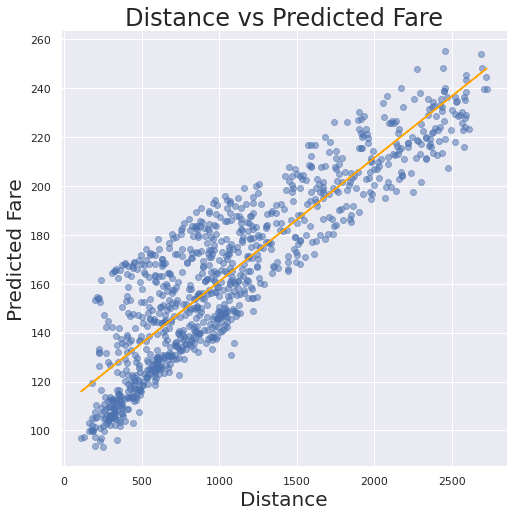


Equation (y = b + m*x )is 110.47071833931442 + ( 0.0505104958956367 * ['Distance'])


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns

sns.set_theme()

plt.figure(figsize= [8,8])
plt.scatter(flight['Distance'],flight['PredictedFare'], alpha = 0.5) 
plt.xlabel('Distance', fontsize=20)
plt.ylabel('Predicted Fare', fontsize=20)
plt.title('Distance vs Predicted Fare', fontsize=24)

plt.plot(flight['Distance'], m * flight['Distance'] + b, color = 'orange')
sns.despine()
# plt.savefig("lm_1.png")
plt.show()

print("\nEquation (y = b + m*x )is {0} + ( {1} * ['Distance'])".format(b,m))

# 8) **Residual Analysis** - 

> variance of the residual has to be constant across different values of the predicted value ('Y') - a property known as homoscedasticity. 

>A non-constant variance of the residuals known as heteroscedasticity is not desired.


In [30]:
flight_lm.fittedvalues.head()

556    137.443323
114    146.686744
325    154.869444
108    148.505122
550    155.526081
dtype: float64

In [31]:
flight_lm.resid.head()

556   -15.705661
114   -15.743400
325    36.233742
108    31.826795
550    11.801955
dtype: float64

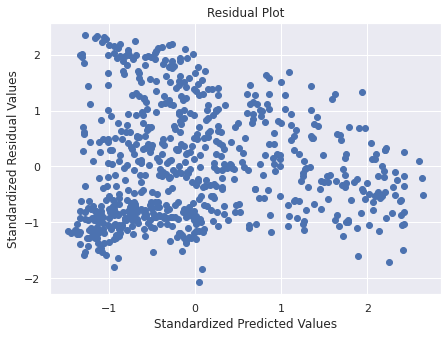

In [32]:
# To standardize, subtract from mean and divide by standard deviation

def get_std_values(vals):
  return (vals - vals.mean())/vals.std()         # z score (Standardization)

x_axis = get_std_values(flight_lm.fittedvalues)
y_axis = get_std_values(flight_lm.resid)

plt.figure(figsize=[7,5])
plt.scatter(x_axis, y_axis)
plt.xlabel("Standardized Predicted Values")
plt.ylabel("Standardized Residual Values")
plt.title("Residual Plot")
plt.savefig('Residual plot.png')
plt.show()

# It is homoscedastic because residual plot between standardised residual values and standardised predicted values is not funnel shaped. 
# variance is constant

# 9) Model Diagnostics - Oulier Detection

> Outliers are observations whose values show a large deviation from the mean value. Their presence can have a significant influence on the values of the regression coefficients. Hence we use Z-Score to identify their existence in the data. 

> Any obervation with an Z-Score of more than 3.0 is an outlier.

In [33]:
from scipy.stats import zscore
flight['zscore_Distance'] = zscore(flight['Distance'])
flight.head()

,Distance,PredictedFare,zscore_Distance
0,528.0,121.753611,-0.827840
1,860.0,172.505965,-0.311552
2,852.0,182.803605,-0.323993
3,288.0,104.440197,-1.201060
4,723.0,152.309288,-0.524599


In [34]:
flight[(flight['zscore_Distance'] > 3.0 )| (flight['zscore_Distance'] < -3.0)].count()      # checking for Outliers
# there are no Outliers

Distance           0
PredictedFare      0
zscore_Distance    0
dtype: int64

# 10) Cook's Distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


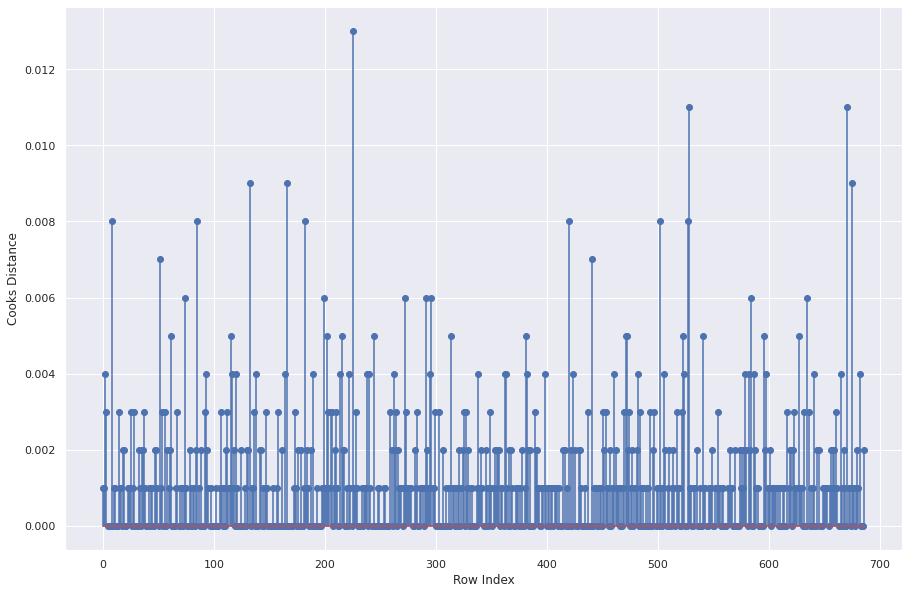

In [35]:
import numpy as np
flight_influence = flight_lm.get_influence()
(c,p) = flight_influence.cooks_distance

plt.figure(figsize = [15,10])
plt.stem(np.arange(len(train_x)), np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

There is no observation with Cooks's distance > 1. Hence none of them are influential.

# 11) Making predictions on validation set and measuring accuracy - R-Squared and RMSE 

In [36]:
from sklearn.metrics import r2_score, mean_squared_error
pred_y = flight_lm.predict(test_x)

R2 = np.abs(r2_score(test_y, pred_y))

print('R-squared value = ', R2)
print('Accuracy is ',np.round(R2 * 100, 2),'%')
print('RMSE value = ',np.round(np.sqrt(mean_squared_error(test_y, pred_y)),2))

R-squared value =  0.8046273341987196
Accuracy is  80.46 %
RMSE value =  16.34
